This notebook shows how to generate the CSV files necessary for the 'An Investigation of Trust in Automated Performance Reviews from Various Professional Perspectives' research paper. Note that the 'responses.xlsx' file must be generated from data collected from surveying participants. The one available in this repository was the originally collected data, and can be used as an example.

In [2]:
# Import necessary libraries
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Read the file and prepare the data and metadata dataframes
file_path = 'responses.xlsx' # Replace this file for your own once you have surveyed participants.

"""
df (pd.DataFrame): The DataFrame containing the data of all responded questions.
meta (pd.Dataframe): The dataframe containing additional information on participants and their conditions.
"""
df = pd.read_excel(file_path, sheet_name='Data')
meta = pd.read_excel(file_path, sheet_name='Metadata')
df.head()

,Q1,Q2,Q3,Q4_1,Q4_2,Q4_3,Q5_1,Q5_2,Q5_3,Q6_1,Q6_2,Q6_3,Q7_1,Q7_2,Q8,Q9,Q10_1,Q11,Q12,ResponseId
0,If you would have to categorize your main area...,Please write down the career title that most c...,What is your age?,Let's set the stage before you give your answe...,Let's set the stage before you give your answe...,Let's set the stage before you give your answe...,Q5 - I would be wary of the system,Q5 - I would expect the system's actions to ha...,Q5 - I would be confident in the system,Q6 - The system would make me feel secure,Q6 - I would believe the system to have integrity,Q6 - I would believe the system to be dependable,Q7 - I feel familiar with the system,Q7 - I would trust the system,Have you ever had this experience in your work...,Would you prefer this method of performance re...,How was your experience with this questionnair...,Would you change anything in particular from t...,"If so, what would you change?",Response ID
1,Artistic,Illustrator,24,4,3,7,4,6,1,0,0,2,0,0,No,Yes,2,Yes,Questions are too long and some have similar m...,R_2SpZoRhK5EGXLEt
2,Social,Law,26,1,6,1,1,2,5,4,6,1,1,5,Yes,No,4,Yes,The time. Taking fast decisions without time t...,R_3Gy9CI9sR2PqJqX
3,Scientific,Psychiatry,26,2,2,1,3,1,5,3,3,6,3,7,No,No,5,No,NaN,R_23dnbHulLYSEWIx
4,Scientific,Computer science,61,5,7,2,6,2,7,6,6,5,6,6,Yes,Yes,5,Yes,The age: a range would be better,R_2Jme5qHflT25lej


In [4]:
# Remove personal information to anonymize and protect particiants' data (data is not available in the example dataset to begin with)
meta.drop(['RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference'], axis=1)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Location Latitude,Location Longitude,Distribution Channel,User Language
1,2024-08-09 14:00:15,2024-08-09 14:03:07,IP Address,67.208.52.7,100,172,True,2024-08-09 14:03:08.161000,R_2SpZoRhK5EGXLEt,51.4964,-0.1224,anonymous,EN
2,2024-08-09 13:57:27,2024-08-09 14:05:35,IP Address,181.50.225.183,100,487,True,2024-08-09 14:05:35.562000,R_3Gy9CI9sR2PqJqX,4.6115,-74.0833,anonymous,EN
3,2024-08-09 14:05:01,2024-08-09 14:06:46,IP Address,191.156.146.178,100,105,True,2024-08-09 14:06:47.325000,R_23dnbHulLYSEWIx,4.6115,-74.0833,anonymous,EN
4,2024-08-09 14:04:33,2024-08-09 14:10:51,IP Address,186.154.207.219,100,377,True,2024-08-09 14:10:51.759000,R_2Jme5qHflT25lej,4.8588,-74.0553,anonymous,EN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,2024-08-12 19:45:52,2024-08-12 19:47:48,IP Address,86.87.128.153,50,115,False,2024-08-19 19:48:01.397000,R_2ls50bQxZMjJUxk,NaN,NaN,anonymous,EN
455,2024-08-12 20:17:41,2024-08-12 20:20:50,IP Address,45.144.227.52,36,189,False,2024-08-19 20:20:54.211000,R_4OjhlCkhEcepRgO,NaN,NaN,anonymous,EN
456,2024-08-12 21:12:05,2024-08-12 21:12:13,IP Address,190.158.204.31,14,7,False,2024-08-19 21:12:14.657000,R_13xKyHxSBXI7xrJ,NaN,NaN,anonymous,EN
457,2024-08-13 00:46:23,2024-08-13 00:47:35,IP Address,180.242.214.180,36,71,False,2024-08-20 00:47:39.655000,R_4MSu7C9lMtvbIfH,NaN,NaN,anonymous,EN


In [5]:
# Transform location information in order to use it.
meta['LocationLatitude'] = pd.to_numeric(meta['LocationLatitude'], errors='coerce')
meta['LocationLongitude'] = pd.to_numeric(meta['LocationLongitude'], errors='coerce')
# Save the metadata as a separate csv file.
meta.to_csv('metadata.csv', index=False)

"""
loc (pd.DataFrame): The DataFrame containing the location data of participants. Can be mapped to df and meta through ResponseId.
"""
loc = meta[['LocationLatitude', 'LocationLongitude', 'ResponseId']].dropna()
loc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 264
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LocationLatitude   240 non-null    float64
 1   LocationLongitude  240 non-null    float64
 2   ResponseId         240 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.5+ KB


In [6]:
loc.head()

,LocationLatitude,LocationLongitude,ResponseId
1,51.4964,-0.1224,R_2SpZoRhK5EGXLEt
2,4.6115,-74.0833,R_3Gy9CI9sR2PqJqX
3,4.6115,-74.0833,R_23dnbHulLYSEWIx
4,4.8588,-74.0553,R_2Jme5qHflT25lej
5,4.6115,-74.0833,R_1VMSbpDVdd2kHpT


In [7]:
# To find the exact country of origin for responses, initiate a geolocator. The user_agent value can be anything.
geolocator = Nominatim(user_agent="AICountries")

def get_country(lat, lon):
    """
    Function to get the country from latitude and longitude
    Parameters:
    lat (float): The latitude of a given location
    lon (float): The longitude of a given location
    """
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True)
        if location and 'country' in location.raw['address']:
            return location.raw['address']['country']
        else:
            return None
    except GeocoderTimedOut:
        return None

# Apply the function to the DataFrame
loc['Country'] = loc.apply(lambda row: get_country(row['LocationLatitude'], row['LocationLongitude']), axis=1)

loc.head()

,LocationLatitude,LocationLongitude,ResponseId,Country
1,51.4964,-0.1224,R_2SpZoRhK5EGXLEt,United Kingdom
2,4.6115,-74.0833,R_3Gy9CI9sR2PqJqX,Colombia
3,4.6115,-74.0833,R_23dnbHulLYSEWIx,Colombia
4,4.8588,-74.0553,R_2Jme5qHflT25lej,Colombia
5,4.6115,-74.0833,R_1VMSbpDVdd2kHpT,Colombia


In [8]:
# Observe the different countries participants came from
country_counts = loc['Country'].value_counts().head(5)
country_counts

Country
Colombia          198
United Kingdom     20
United States       6
Canada              3
España              2
Name: count, dtype: int64

C:\Users\Jaime\AppData\Local\Temp\ipykernel_880\1591397742.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")


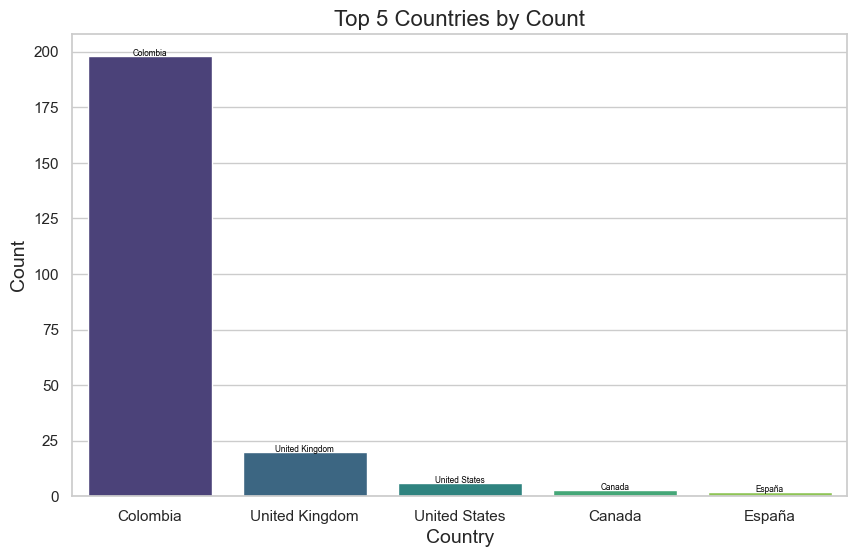

In [9]:
# Set the style to visualize the top 5 countries the participants come from
sns.set(style="whitegrid")

# Create a barplot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=country_counts.index, y=country_counts.values, palette="viridis")

# Label each bar with the country name
for index, value in enumerate(country_counts.values):
    bar_plot.text(index, value + 0.1, country_counts.index[index], color='black', ha="center", fontsize=6)

# Label the axes
plt.xlabel('Country', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 5 Countries by Count', fontsize=16)

# Display the chart
plt.show()

In [10]:
# Save the location info as a csv file
loc.to_csv('Locations.csv', index=False)

In [11]:
# Check whether the datatype for the df dataframe is correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Q1          331 non-null    object
 1   Q2          331 non-null    object
 2   Q3          331 non-null    object
 3   Q4_1        242 non-null    object
 4   Q4_2        242 non-null    object
 5   Q4_3        242 non-null    object
 6   Q5_1        242 non-null    object
 7   Q5_2        242 non-null    object
 8   Q5_3        242 non-null    object
 9   Q6_1        233 non-null    object
 10  Q6_2        233 non-null    object
 11  Q6_3        233 non-null    object
 12  Q7_1        233 non-null    object
 13  Q7_2        233 non-null    object
 14  Q8          232 non-null    object
 15  Q9          232 non-null    object
 16  Q10_1       230 non-null    object
 17  Q11         230 non-null    object
 18  Q12         39 non-null     object
 19  ResponseId  438 non-null    object
dtypes: object(

In [12]:
# Create a new dataframe 'red' (Stands for 'reduced') with only responses that answered all questions between Q4_1 and Q7_2
red = df.dropna(subset=['Q4_1', 'Q4_2', 'Q4_3', 'Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q7_1', 'Q7_2'])
red.drop(index=[0])

# Replace null values in Q3 with '28', the mean value for ages in the example data. (This could vary depending on your data)
red['Q3'] = red['Q3'].fillna('28')

# Truncate all values in Q3 to 2 characters long (To remove possible issues)
red['Q3'] = red['Q3'].str[:2]

# Change the type of Q3 through Q7_2 and Q10_1 into numbers (If issues occur, check Q3 for possible wrong input)
columns_to_convert = ['Q3', 'Q4_1', 'Q4_2', 'Q4_3', 'Q5_1', 'Q5_2', 'Q5_3', 'Q6_1', 'Q6_2', 'Q6_3', 'Q7_1', 'Q7_2', 'Q10_1']
red[columns_to_convert] = red[columns_to_convert].apply(pd.to_numeric, errors='coerce')
red.info()

# Remove the first row of 'red', with the column names
red = red.iloc[1:]

# Reset the index of 'red'
red = red.reset_index(drop=True)

# Add the 'Negative' column as the mean value of Q4_1 through Q5_2
red['Negative'] = red[['Q4_1', 'Q4_2', 'Q4_3', 'Q5_1', 'Q5_2']].mean(axis=1)

# Add the 'Positive' column as the mean value of Q5_3 through Q6_3
red['Positive'] = red[['Q5_3', 'Q6_1', 'Q6_2', 'Q6_3']].mean(axis=1)

# Rename columns to make what each one stands for clearer.
red = red.rename(columns={'Q7_1': 'Familiarity', 'Q7_2': 'Trust'})

red = red.rename(columns={"Q1": "ProfessionType", "Q2": "Profession", "Q3": "Age", "Q4_1": "Deceptiveness", "Q4_2": "Underhandedness", "Q4_3": "SuspiciousIntent", "Q5_1": "Wariness", "Q5_2": "Harmful", "Q5_3": "Confident", "Q6_1": "Secure", "Q6_2": "Integrity", "Q6_3": "Dependable", "Q8": "Experience", "Q9": "Preference", "Q10_1": "Rating", "Q11": "Changes", "Q12": "Feedback"})

# Merge the main database with the metadata database to obtan country information
red = red.merge(loc[['ResponseId', 'Country']], on='ResponseId', how='left')

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 427
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Q1          233 non-null    object 
 1   Q2          233 non-null    object 
 2   Q3          231 non-null    float64
 3   Q4_1        232 non-null    float64
 4   Q4_2        232 non-null    float64
 5   Q4_3        232 non-null    float64
 6   Q5_1        232 non-null    float64
 7   Q5_2        232 non-null    float64
 8   Q5_3        232 non-null    float64
 9   Q6_1        232 non-null    float64
 10  Q6_2        232 non-null    float64
 11  Q6_3        232 non-null    float64
 12  Q7_1        232 non-null    float64
 13  Q7_2        232 non-null    float64
 14  Q8          232 non-null    object 
 15  Q9          232 non-null    object 
 16  Q10_1       229 non-null    float64
 17  Q11         230 non-null    object 
 18  Q12         39 non-null     object 
 19  ResponseId  233 non-null    object

C:\Users\Jaime\AppData\Local\Temp\ipykernel_880\247104785.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red['Q3'] = red['Q3'].fillna('28')
C:\Users\Jaime\AppData\Local\Temp\ipykernel_880\247104785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  red['Q3'] = red['Q3'].str[:2]
C:\Users\Jaime\AppData\Local\Temp\ipykernel_880\247104785.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [13]:
# Observe generated reduced dataframe
red.head()

,ProfessionType,Profession,Age,Deceptiveness,Underhandedness,SuspiciousIntent,Wariness,Harmful,Confident,Secure,...,Trust,Experience,Preference,Rating,Changes,Feedback,ResponseId,Negative,Positive,Country
0,Artistic,Illustrator,24.0,4.0,3.0,7.0,4.0,6.0,1.0,0.0,...,0.0,No,Yes,2.0,Yes,Questions are too long and some have similar m...,R_2SpZoRhK5EGXLEt,4.8,0.75,United Kingdom
1,Social,Law,26.0,1.0,6.0,1.0,1.0,2.0,5.0,4.0,...,5.0,Yes,No,4.0,Yes,The time. Taking fast decisions without time t...,R_3Gy9CI9sR2PqJqX,2.2,4.00,Colombia
2,Scientific,Psychiatry,26.0,2.0,2.0,1.0,3.0,1.0,5.0,3.0,...,7.0,No,No,5.0,No,NaN,R_23dnbHulLYSEWIx,1.8,4.25,Colombia
3,Scientific,Computer science,61.0,5.0,7.0,2.0,6.0,2.0,7.0,6.0,...,6.0,Yes,Yes,5.0,Yes,The age: a range would be better,R_2Jme5qHflT25lej,4.4,6.00,Colombia
4,Scientific,Chemical Engineering,24.0,2.0,2.0,2.0,3.0,2.0,5.0,5.0,...,3.0,Yes,No,5.0,No,NaN,R_1VMSbpDVdd2kHpT,2.2,4.00,Colombia


In [14]:
# Save red as a csv file
red.to_csv('reduced.csv', index=False)